In [1]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import dexplot as dxp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn import preprocessing
import lightgbm as lgbm
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from xgboost import XGBClassifier

In [2]:
cd desktop

C:\Users\VIJESH\desktop


In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df['TotalCharges'].value_counts() #blank cells are there in Total charges column

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
970.45      1
1496.45     1
815.55      1
613.95      1
92.65       1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype(float) #replaced the blank cells as 0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

## Exploratory Data Analysis

### Number of customer churned

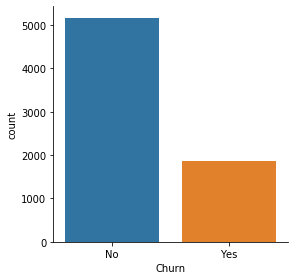

In [9]:

sns.catplot(x="Churn", kind="count", data=df,height=4) 

### Percentage of Customer churned

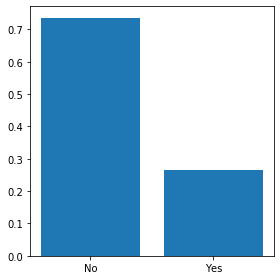

In [10]:
dxp.aggplot(agg="Churn", data=df,normalize='all',figsize=(4, 4))

### Number of senior citizen churned

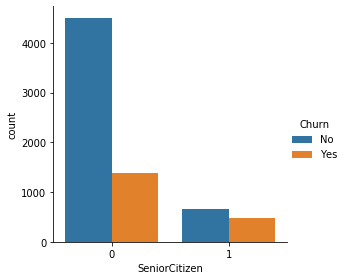

In [11]:
sns.catplot(x='SeniorCitizen', kind="count", hue='Churn',data=df,height=4) 

### Distribution of partner in case of churning

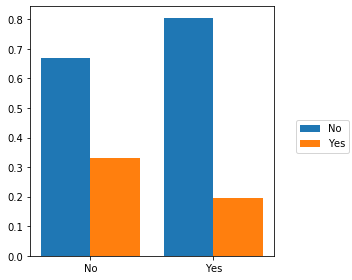

In [12]:
dxp.aggplot(agg='Partner', data=df, hue='Churn',normalize='Partner',figsize=(4, 4))

### Distribution of customers churning with respect to the internet service they have opted

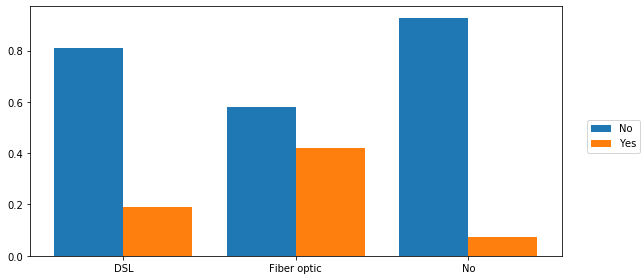

In [13]:
dxp.aggplot(agg='InternetService', data=df, hue='Churn',normalize='InternetService',figsize=(8, 4))

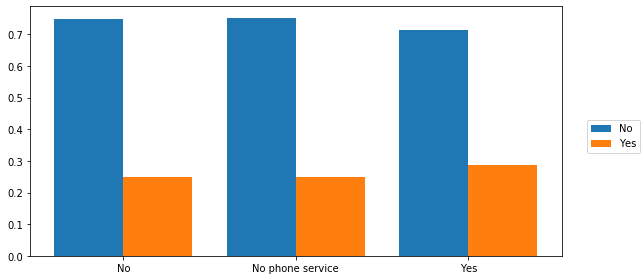

In [14]:
dxp.aggplot(agg='MultipleLines', data=df, hue='Churn',normalize='MultipleLines',figsize=(8, 4))

### Distribution of customers churning with respect to the Payment method  they are following

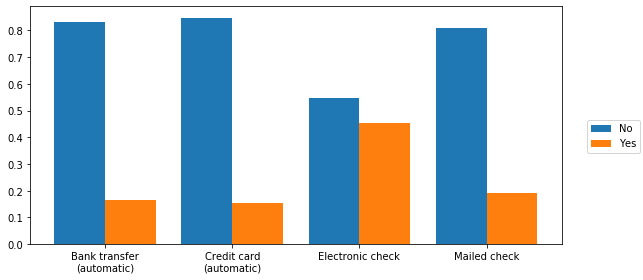

In [15]:
dxp.aggplot(agg='PaymentMethod', data=df, hue='Churn',normalize='PaymentMethod',figsize=(8, 4))

### Distibution of customer churning with respect to the tenure of usage

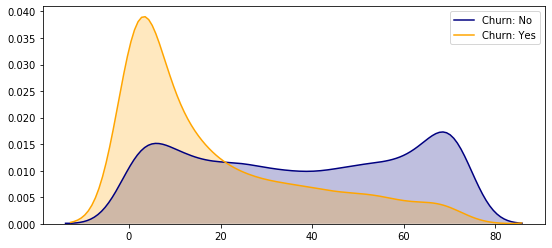

In [16]:
plt.figure(figsize=(9, 4))
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], color= 'navy',shade=True, label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], color= 'orange',shade=True, label= 'Churn: Yes')

### Distribution of customers churning with respect to the Monthly charges

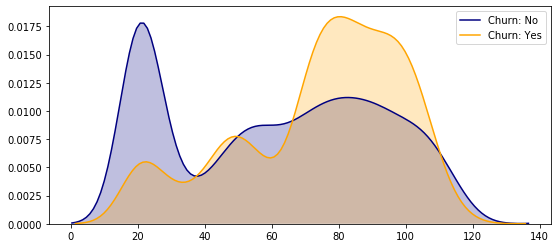

In [17]:
plt.figure(figsize=(9, 4))
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color= 'navy', shade=True,label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color= 'orange',shade=True, label= 'Churn: Yes')

### Distribution of customers churning with respect to the Total charges

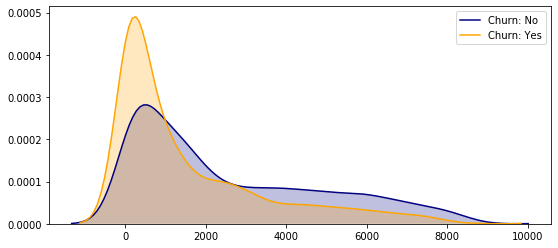

In [18]:
plt.figure(figsize=(9, 4))
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], color= 'navy',shade=True, label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], color= 'orange', shade=True,label= 'Churn: Yes')

### Distribution of customer churning with respect to the plan and the billing mode they have choosen

(<Figure size 576x288 with 2 Axes>,)

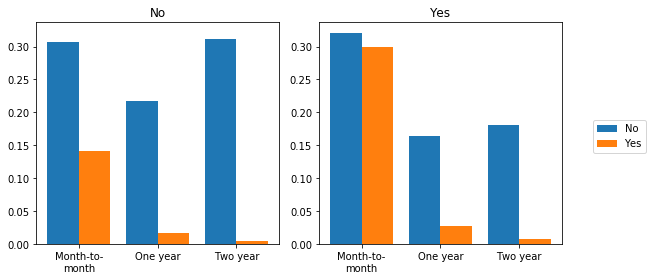

In [19]:
dxp.aggplot(agg='Contract', data=df, hue='Churn', kind='bar',col='PaperlessBilling',normalize='PaperlessBilling',figsize=(8, 4))

## Churn Prediction

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [21]:
df=df.drop(columns='customerID') # droping Customer ID because it is unique Identifier

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [24]:
for i in range(len(columns)):
    df[columns[i]]=LabelEncoder().fit_transform(df[columns[i]]) #converting all textual catagorical variable into 0&1 

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
x=df.drop(columns='Churn') #takes all the features as 'x'
y=df['Churn'].copy()       #takes the target feature as 'y'


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) #spliting the data

### Logistic Regression

In [27]:
lr = LogisticRegression()

#training the model
lr.fit(x_train, y_train)

#evaluating with the test data
y_pred = lr.predict(x_test) 

#accuracy score
score =accuracy_score(y_test,y_pred) 
print("Logistic Regression  Accuracy is ")
print(score*100)

#confusion matrix
c_m=confusion_matrix(y_test, y_pred) 

c_m

Logistic Regression  Accuracy is 
80.76650106458482


C:\Users\VIJESH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[929, 100],
       [171, 209]], dtype=int64)

### Neural Network

In [28]:
model = MLPClassifier(hidden_layer_sizes=(100,50,40,30))   # hidden Layers

#training the model
model.fit(x_train, y_train) 

#evaluating with test data
predicted_classes = model.predict(x_test) 

# accuracy Percentage
accuracy = accuracy_score(y_test,predicted_classes) 
print("Neural Network Accuracy is ")
print(accuracy*100)

#confusion Matrix
c_m=confusion_matrix(y_test, y_pred)
c_m

Neural Network Accuracy is 
80.0567778566359


array([[929, 100],
       [171, 209]], dtype=int64)

### Random forest

In [29]:
clf = RandomForestClassifier(n_estimators=100)

#Training the model
clf.fit(x_train, y_train) 

#evaluating the test data
predicted_classes = clf.predict(x_test) 

#Accuracy Percentage
accuracy = accuracy_score(y_test,predicted_classes)
print("random forest Accuracy is ")
print(accuracy*100)

#confusion Matrix
c_m=confusion_matrix(y_test, y_pred)
c_m

random forest Accuracy is 
80.48261178140525


array([[929, 100],
       [171, 209]], dtype=int64)

## Feature Importance using XGB

Accuracy: 80.98%


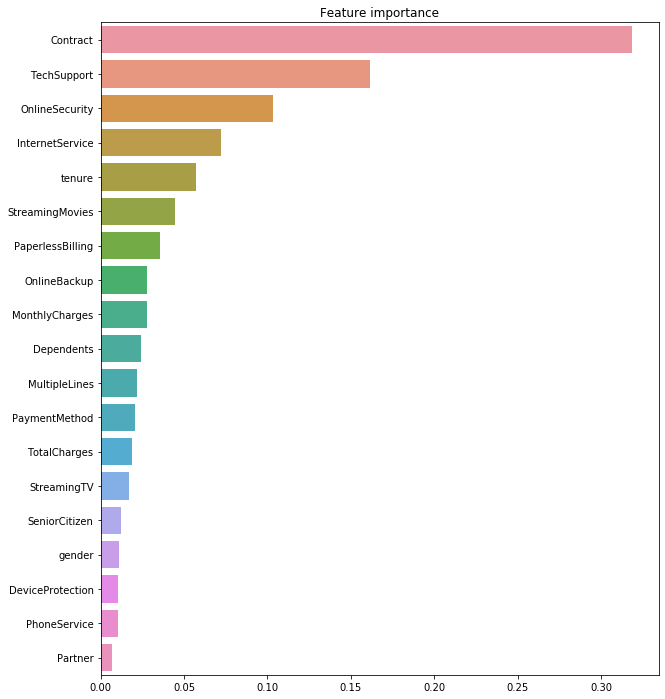

In [30]:
# use feature importance for feature selection
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


imp = pd.Series(data=model.feature_importances_, index=x.columns).sort_values(ascending=False) 
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')


## Feature selection 

In [31]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    #predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.007, n=19, Accuracy: 80.98%
Thresh=0.010, n=18, Accuracy: 80.84%
Thresh=0.010, n=17, Accuracy: 80.77%
Thresh=0.011, n=16, Accuracy: 81.12%
Thresh=0.012, n=15, Accuracy: 80.62%
Thresh=0.017, n=14, Accuracy: 80.98%
Thresh=0.018, n=13, Accuracy: 81.12%
Thresh=0.021, n=12, Accuracy: 80.84%
Thresh=0.022, n=11, Accuracy: 80.55%
Thresh=0.024, n=10, Accuracy: 80.98%
Thresh=0.027, n=9, Accuracy: 81.12%
Thresh=0.028, n=8, Accuracy: 81.26%
Thresh=0.036, n=7, Accuracy: 81.12%
Thresh=0.045, n=6, Accuracy: 80.20%
Thresh=0.057, n=5, Accuracy: 80.27%
Thresh=0.072, n=4, Accuracy: 78.64%
Thresh=0.103, n=3, Accuracy: 76.51%
Thresh=0.161, n=2, Accuracy: 74.38%
Thresh=0.319, n=1, Accuracy: 73.03%


we can see that as the features are reduced the accuracy increased till model with 16 features , then it starts decreasing.

## K-Means Clusturing

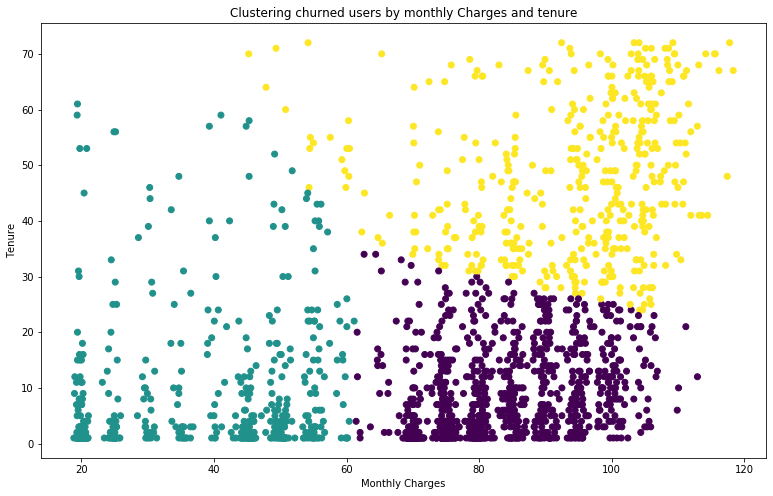

In [32]:
monthly_tenure = df[['MonthlyCharges','tenure']][df.Churn == 1] # considering only the customers who have churned

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_tenure) # Three clusters

monthly_tenure['cluster'] = kmeans.labels_

plt.subplots(figsize=(13,8))

#plotting in scatter plot
plt.scatter( monthly_tenure['MonthlyCharges'], monthly_tenure['tenure'],
           c = monthly_tenure['cluster'])

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()